 lib import 為 * ,在使用時可不使用物件
%matplotlib inline 是把可以將matplotlib的圖表直接嵌入到Notebook之中

In [3]:
from numpy import *
from scipy.signal import savgol_filter
from scipy.interpolate import * 
from matplotlib.pyplot import *
from scipy.interpolate import CubicSpline
from scipy import interpolate
%matplotlib inline

In [4]:
import csv 
data={}
f = open('0201T3.csv', 'r')
for row in csv.DictReader(f):
    data[row['時間']]=row['值']
f.close()

In [5]:
def rsq(x,y,pfit):
    if (len(y)==len(pfit)):
          Sresid =(y - pfit)
    else:
        Sresid =(y - polyval(pfit,x))
    SSresid= sum(pow(Sresid,2))
    SStotal=len(y)*var(y)
    rsq=1-SSresid/SStotal
    return rsq

def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)

def coeff_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_line)
    squared_error_y_mean = squared_error(ys_orig,y_mean_line)   
    return 1 - ( squared_error_regr / squared_error_y_mean)

def least_square(fuc,ys_orig,m,n,x):
    ys_line=polyval(fuc,x)
    err=squared_error(ys_orig,ys_line)
    lsq=err/(m-n-1)
    return lsq

In [6]:
def cubic_spline(x, y):
    """
    Parameters
    ----------
    x  : list of floats
    y  : list of floats
    
    Returns
    -------  
    list of list of floats
    """
    n = len(x) - 1
    h = [x[i+1]-x[i] for i in range(n)]
    al = [3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]) for i in range(1,n)]
    al.insert(0,0)
    l = [1] * (n+1)
    u = [0] * (n+1)
    z = [0] * (n+1)
    for i in range(1, n):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (al[i] - h[i-1]*z[i-1])/l[i]
        
    b = [0] * (n+1)
    c = [0] * (n+1)
    d = [0] * (n+1)
    for i in range(n-1, -1, -1):    #for i in reversed(range(n)):
        c[i] = z[i] - u[i]*c[i+1]
        b[i] = (y[i+1]-y[i])/h[i] - h[i]*(c[i+1] + 2*c[i])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    return [y, b, c, d]


In [7]:
def printfx(cbsp):
    d=0.0
    c=0.0
    b=0.0
    a=0.0

    for i  in range(len(cbsp[0])):
                    d=cbsp[0][i]
                    c=cbsp[1][i]    
                    b=cbsp[2][i]
                    a=cbsp[3][i]
                    print( '{:>4d} ~ {:>4d}   {: >+5.6f}( x - {: d})^3{: >+5.4f}( x - {: d} )^2{: >+5.4f}( x - {: d} ){: >+5.4f}'.format(i,i+1,a,i,b,i,c,i,d) )

In [8]:
def cbspVal(x,cbF):
    # prepare data for plotting the splines
    xs=[]
    xs=arange(len(x))
    ys = []
    for i in range(len(x)):
        ys.append(cbF[0][i] + cbF[1][i]*(xs[i]-i) + cbF[2][i]*(xs[i]-i)**2 + cbF[3][i]*(xs[i]-i)**3)
    return xs,ys


In [9]:
###### import math  
import matplotlib.pyplot as plt
import numpy as np

  # the function to be interpolated
def f(x):
    return math.e ** x
    
# input
interval = 3
#x = [i for i in range(interval + 1)]
#y = [f(i) for i in range(interval + 1)]
x=np.arange(5)

y=[-9,-12,0,21,55]
# process
a = cubic_spline(x, y)
print(len(a))
print()
print(a)
print()
printfx(a)
# prepare data for plotting the splines
xs,ys=cbspVal(x,a)
print(ys)
# prepare data for plotting the given function
#x = np.linspace(0, 5, interval * points_per_interval - (interval - 1))
#y = [f(x[i]) for i in range(len(x))]
#x=np.arange(5)
#y=[-9,-12,0,21,55]

#plt.plot(x, y, 'k.-', xs[0], ys[0], 'r.--', xs[1], ys[1], 'g.--', xs[2], ys[2], 'b.--',xs[3],ys[3],'--',xs[4],ys[4],'--')
#plt.plot(x,y,'k-',xs,ys,'r--')
#plt.title('Cubic Spline')

#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()

# cubic spline interpolation
# author : worasait suwannik
# date   : apr 2015



4

[[-9, -12, 0, 21, 55], [-6.607142857142858, 4.214285714285714, 16.75, 27.785714285714285, 0], [0.0, 10.821428571428571, 1.7142857142857144, 9.321428571428571, 0], [3.607142857142857, -3.035714285714286, 2.5357142857142856, -3.107142857142857, 0]]

   0 ~    1   +3.607143( x -  0)^3+0.0000( x -  0 )^2-6.6071( x -  0 )-9.0000
   1 ~    2   -3.035714( x -  1)^3+10.8214( x -  1 )^2+4.2143( x -  1 )-12.0000
   2 ~    3   +2.535714( x -  2)^3+1.7143( x -  2 )^2+16.7500( x -  2 )+0.0000
   3 ~    4   -3.107143( x -  3)^3+9.3214( x -  3 )^2+27.7857( x -  3 )+21.0000
   4 ~    5   +0.000000( x -  4)^3+0.0000( x -  4 )^2+0.0000( x -  4 )+55.0000
[-9.0, -12.0, 0.0, 21.0, 55]


savgol_filter 是透過Savitzky-Golay平滑去噪 

1285
0.9939386143393719


'av=array(v)\nam=mean(av)\nprint(am)\na=[mean(av) for y in av]\nprint(a)\nprint(rsq(t,v,sgf))\nprint(coeff_of_determination(array(v),sgf))\n'

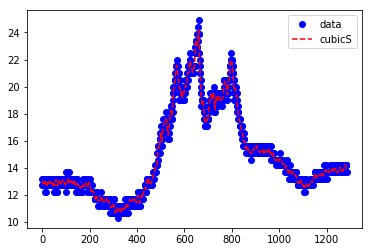

In [10]:
i=0
t=[]
v=[]
for value in data.values():
    t.append(i)
    v.append(float(value))
    i+=1
cs=cubic_spline(t,v)
print(len(cs[0]))
tck,u=interpolate.splprep([t,v],s=0.0)
x_i,y_i= interpolate.splev(u,tck)

sgf=savgol_filter(array(v),11,2)
#csx_i,csy_i=cbspVal(t,cs)
#printfx(cs)
#plot(t,v,'o')
#plot(t,sgf,'-')
#plot(t,cs(t))

#plot(t,csy_i)
plot(t, v, 'bo',t,sgf, 'r--')
legend(['data',  'cubicS'], loc='best')
print(coeff_of_determination(array(v),sgf))
#print(coeff_of_determination(array(v),y_i))
#print(coeff_of_determination(array(v),csy_i))
'''av=array(v)
am=mean(av)
print(am)
a=[mean(av) for y in av]
print(a)
print(rsq(t,v,sgf))
print(coeff_of_determination(array(v),sgf))
'''

In [14]:
import pandas as pd 
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected = True)
iplot([{"x": t, "y":v}])


下面程式為把全部Data value 中特定區域取出來

In [ ]:
def mkfile():
    with open('pt.csv','wt',newline='') as csvFile:
        csvHeader=["start","end","polyStartValue","orgStartValue","polyEndValue","orgEndValue","Rsq","f(x)"]
        writer=csv.DictWriter(csvFile,csvHeader)
        writer.writeheader()


In [ ]:
def lab1():
    mkfile()
    i=0
    count=1
    stop=False
    startPt=0
    endPt=0
    delta=0
    itl=[]
    fx=[]
    '''
    plot(t,v,'-')
    plot(t,sgf,'-')
    '''
    print(len(t))
    while(startPt<=(len(t)-1)):
        x=[]
        y=[]
        vt=[]
        for i in range(startPt,len(t)):
                if(abs(sgf[startPt]-sgf[i])<=0.2)  and i<(len(t)-1):
                    x.append(t[i])
                    y.append(float(sgf[i]))
                    vt.append(float(v[i]))
                else:
                    delta=i-startPt
                    endPt=i
                    x.append(t[i])
                    y.append(float(sgf[i]))
                    vt.append(float(v[i]))
                    break
        tp =polyfit(x,vt,2)
        #cs=CubicSpline(x,y)
        itl.append(count)
        itl.append(startPt)
        itl.append(endPt)
        fx.append(tp[0])
        fx.append(tp[1])
        fx.append(tp[2])
        f=poly1d(tp)
        ys_line=polyval(tp,x)
        rsqSGF=coeff_of_determination(array(y),ys_line)
        rsqTT=coeff_of_determination(array(vt),ys_line)
        print(count,'.'," start : ",'{:>4d}'.format(startPt),"  end : ",endPt," polyStartValue : ",'%.2f' % round(ys_line[0], 2),\
              " orgStartValue : ",v[endPt], " sgfStartValue : ",'%.2f' % round(sgf[startPt], 2)) 
        print( '%44s' %(" "),"polyEndValue :",'%.2f' % round(ys_line[delta],2),"orgEndValue : ",v[startPt],\
              "sgfEndValue : ",'%.2f' % round(sgf[startPt], 2))
        print('%44s' %(" "),"Rsq(Orig) : ",'%.3f ' % round(rsqTT,3),"Rsq(SGF) : ",'%.3f ' % round(rsqSGF,3))
        count+=1                
        print() 
        plot(x,ys_line,'r-')
        plot(t, v, 'bo', t,cs(t), 'r--',x,ys_line,'g-')
        legend(['Raw_data',  'Cubic_Spline','Savitzky-Golay'], loc='best')
        with open('pt.csv','a')as csvfile:
            csvHeader=["start","end","polyStartValue","orgStartValue","polyEndValue","orgEndValue","Rsq","f(x)"]
            writer=csv.DictWriter(csvfile,csvHeader)
            writer.writerow({"start":startPt ,"end":endPt,"polyStartValue":ys_line[0],\
                             "orgStartValue":v[endPt],"polyEndValue":ys_line[delta],"orgEndValue":v[startPt],"Rsq":rsqTT,"f(x)":tp})
        startPt= endPt+1

         



In [ ]:
itl=[]
fx=[]
def lab2():
    mkfile()
    count=1
    stop=False
    startPt=0
    endPt=0
    delta=0
    d=0
    rsqSGF=0.0
    rsqTT=0.0
    '''
    plot(t,v,'-')
    plot(t,sgf,'-')
    '''
    plot(t,v,'-')
    plot(t,sgf,'-')
    print(len(t))
    d=int(len(t)/4)
    c=0
    while(startPt<(len(t)-1)):
        x=[]
        y=[]
        vt=[]
    
        for i in range(startPt,d):
            if(i<(d-1)) and (i<(len(t)-1)) and (abs(sgf[startPt]-sgf[i])<=2) :
                x.append(t[i])
                y.append(float(sgf[i]))
                vt.append(float(v[i]))
            else:
                delta=i-startPt
                endPt=i
                x.append(t[i])
                y.append(float(sgf[i]))
                vt.append(float(v[i]))
                break
        tp =polyfit(x,y,2)
        f=poly1d(tp)
        ys_line=polyval(tp,x)
        rsqSGF=coeff_of_determination(array(y),ys_line)
        rsqTT=coeff_of_determination(array(vt),ys_line)
        if(rsqSGF>=0.89) or ((d-10)<=startPt) :         
            print(f)
            print(count,'.'," start : ",'{:>4d}'.format(startPt),"  end : ",endPt," polyStartValue : ",'%.2f' % round(ys_line[0], 2),\
                  " orgStartValue : ",v[endPt], " sgfStartValue : ",'%.2f' % round(sgf[startPt], 2)) 
            print( '%44s' %(" "),"polyEndValue :",'%.2f' % round(ys_line[delta],2),"orgEndValue : ",v[startPt],\
                  "sgfEndValue : ",'%.2f' % round(sgf[startPt], 2))
            print('%44s' %(" "),"Rsq(Orig) : ",'%.3f ' % round(rsqTT,3),"Rsq(SGF) : ",'%.3f ' % round(rsqSGF,3))           
            print()
            plot(x,ys_line,'r-')
            with open('pt.csv','a')as csvfile:
                csvHeader=["start","end","polyStartValue","orgStartValue","polyEndValue","orgEndValue","Rsq","f(x)"]
                writer=csv.DictWriter(csvfile,csvHeader)
                writer.writerow({"start":startPt ,"end":endPt,"polyStartValue":ys_line[0],\
                                 "orgStartValue":v[endPt],"polyEndValue":ys_line[delta],"orgEndValue":v[startPt],"Rsq":rsqTT,"f(x)":tp})  
            itl.append(count)
            itl.append(startPt)
            itl.append(endPt)
            fx.append(tp[0])
            fx.append(tp[1])
            fx.append(tp[2])
            count+=1     
            d=endPt+int((len(t)-delta)/2)
            startPt= endPt+1
            print("round :",c)
           
        else:
             d-=10
        c+=1


In [ ]:
lab2()

In [ ]:
n=0
count=28

while(n<5) and ((count-2)*3<=len(itl)):
    x=[]
    y=[]
    vt=[]
    tp=array([0.0,0.0,0.0])
    itl_count=(count-2)*3

    for i in range(itl[itl_count-2] ,itl[itl_count-1]+1  ):
        x.append(t[i])
        y.append(float(sgf[i]))
        vt.append(float(v[i]))

   # x.append(itl[itl_count-1]+1) 
   # y.append(float(sgf[itl[itl_count-1]+1]))
   # vt.append(float(v[itl[itl_count-1]+1]))
    plot(x,vt,'bo')
    plot(x,y,'r-')   
    tp1=polyfit(x,y,2)
    tp[0],tp[1] ,tp[2]=fx[itl_count-3],fx[itl_count-2],fx[itl_count-1]
    f=poly1d(tp)
    f1=poly1d(tp)
    ytp=polyval(tp,x)
    rsqSGF=coeff_of_determination(array(y),ytp)
    print(ytp)
    print('{:>3d}.  {:>5d} - {:>5d}:  Rsq(SGF):{:5.3f}  ls={:5.3f}'.format(count-2,itl[itl_count-2],itl[itl_count-1],rsqSGF,least_square(tp,y,len(x),2,x)))  
    print(f)
    print()
    plot(x,ytp,'k-')
    count+=1
    n+=1
  


